<a href="https://colab.research.google.com/github/SidCodes0001/CNN_dogs_cats/blob/main/cat_dog1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# i have my dataset in zip file in drive, so in this cell i am unzipping this data
!kaggle datasets download -d salader/dogs-vs-cats
!unzip /content/dogs-vs-cats.zip -d /content/

In [ ]:
!pip install tensorflow numpy matplot numpy pandas

In [4]:
# imported all the necessary libraries
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [5]:
#function to plot random images for understanding and visualizing data

def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

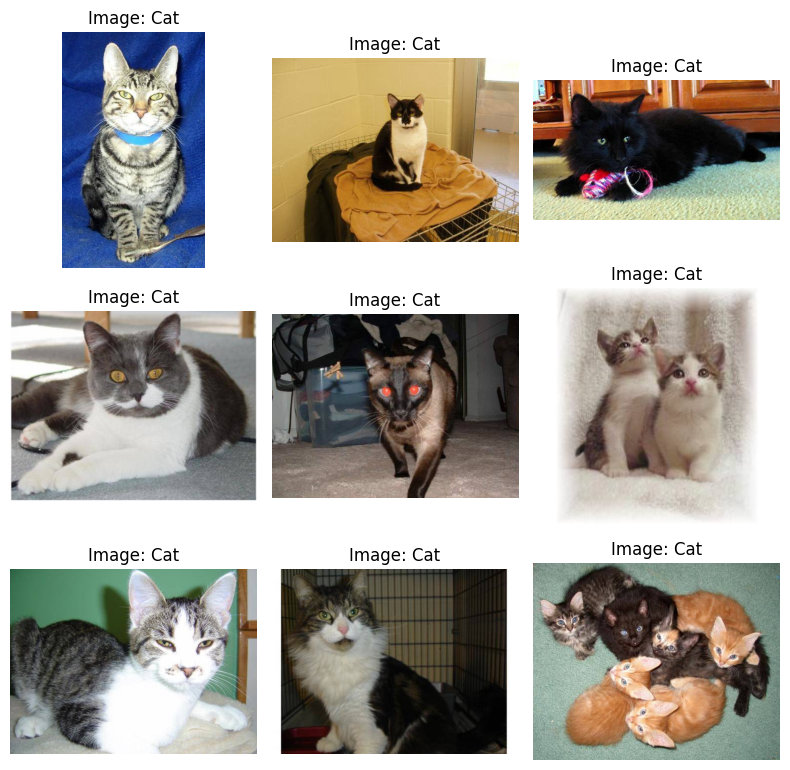

In [6]:
# Placeholder for the directory path
cat_directory_path = '/content/dogs_vs_cats/train/cats'
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

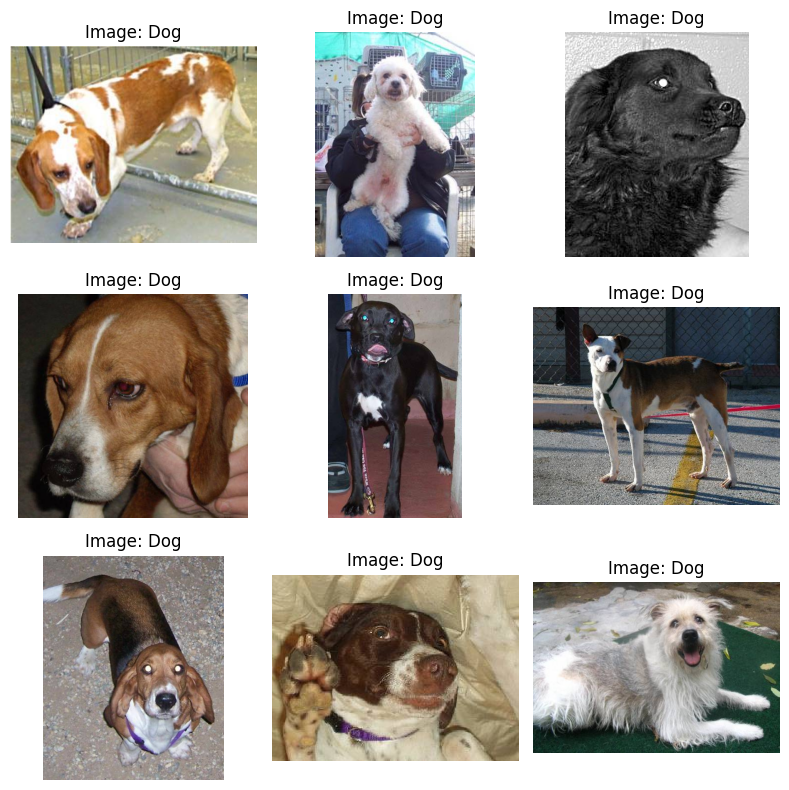

In [7]:
# Placeholder for the directory path
dog_directory_path = '/content/dogs_vs_cats/train/dogs'
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

# **data analysis**


In [8]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats','Dogs']

count = [len(cat_images),len(dog_images)]
print(count)

[10000, 10000]


# **Removing Corrrupted images**

In [9]:
import os
import cv2
import imghdr

image_extns = ['jpg','png','jpeg']
data_dir = '/content/dogs_vs_cats'

for root,dirs,files in os.walk(data_dir):
  for file in files:
    file_path  = os.path.join(root,file)

    try:
      file_type = imghdr.what(file_path)

      if file_type not in image_extns:
        os.remove(file_path)
      else:
        img = cv2.imread(file_path)

    except Exception as e:
      print("Issue with file ",file_path,"error: ",e)
      os.remove(file_path)




# **Converting image to array**


array([[[122,  54,  53],
        [126,  58,  57],
        [130,  62,  61],
        ...,
        [138,  70,  69],
        [138,  70,  69],
        [142,  74,  73]],

       [[123,  55,  54],
        [126,  58,  57],
        [129,  61,  60],
        ...,
        [126,  58,  57],
        [132,  64,  63],
        [138,  70,  69]],

       [[124,  56,  55],
        [126,  58,  57],
        [127,  59,  58],
        ...,
        [137,  69,  68],
        [144,  76,  75],
        [149,  81,  80]],

       ...,

       [[223, 159, 159],
        [219, 155, 155],
        [215, 151, 151],
        ...,
        [199, 143, 144],
        [201, 145, 146],
        [203, 147, 148]],

       [[225, 161, 161],
        [214, 150, 150],
        [202, 138, 138],
        ...,
        [203, 147, 148],
        [204, 148, 149],
        [204, 148, 149]],

       [[228, 164, 164],
        [212, 148, 148],
        [194, 128, 129],
        ...,
        [204, 150, 150],
        [203, 147, 148],
        [200, 144, 145]]], dtype=uint8)
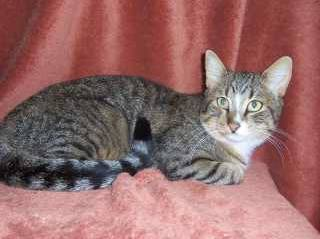

In [10]:
import numpy as np
from PIL import Image
# this functions simply opens the image and converts it into array
def image_to_array(image_path):

  try:
    with Image.open(image_path) as img:
      image_array = np.array(img)
      return image_array

  except:
    return None


image_to_array('/content/train/cats/cat.10004.jpg')


In [11]:
# same task we can also do using cv2

import cv2

image = '/content/train/cats/cat.10004.jpg'

img = cv2.imread(image)

if img is not None:
  print(img)
  print(img.shape)

[[[ 53  54 122]
  [ 57  58 126]
  [ 61  62 130]
  ...
  [ 69  70 138]
  [ 69  70 138]
  [ 73  74 142]]

 [[ 54  55 123]
  [ 57  58 126]
  [ 60  61 129]
  ...
  [ 57  58 126]
  [ 63  64 132]
  [ 69  70 138]]

 [[ 55  56 124]
  [ 57  58 126]
  [ 58  59 127]
  ...
  [ 68  69 137]
  [ 75  76 144]
  [ 80  81 149]]

 ...

 [[159 159 223]
  [155 155 219]
  [151 151 215]
  ...
  [144 143 199]
  [146 145 201]
  [148 147 203]]

 [[161 161 225]
  [150 150 214]
  [138 138 202]
  ...
  [148 147 203]
  [149 148 204]
  [149 148 204]]

 [[164 164 228]
  [148 148 212]
  [129 128 194]
  ...
  [150 150 204]
  [148 147 203]
  [145 144 200]]]
(239, 320, 3)


In [12]:
#set path to dataset

#using image data generator to fetch images from directory to feed it to model in batches

base_dir = '/content/dogs_vs_cats/train/'

train_datagen  = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150), # Resizing images to 150x150
    color_mode='rgb',
    batch_size=20,
    class_mode='binary', # Since we use binary_crossentropy loss, we need binary labels
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=20,
    class_mode='binary',
    subset='validation' # Set as validation data
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# **getting class lables**

In [13]:
#accessing lables for training data

train_class_lables = train_generator.class_indices
print("training class labels: ",train_class_lables)


#accessing lables for validation data

validation_class_lables = train_generator.class_indices
print("validation class labels: ",validation_class_lables)

training class labels:  {'cats': 0, 'dogs': 1}
validation class labels:  {'cats': 0, 'dogs': 1}


#Visualizing the batch images

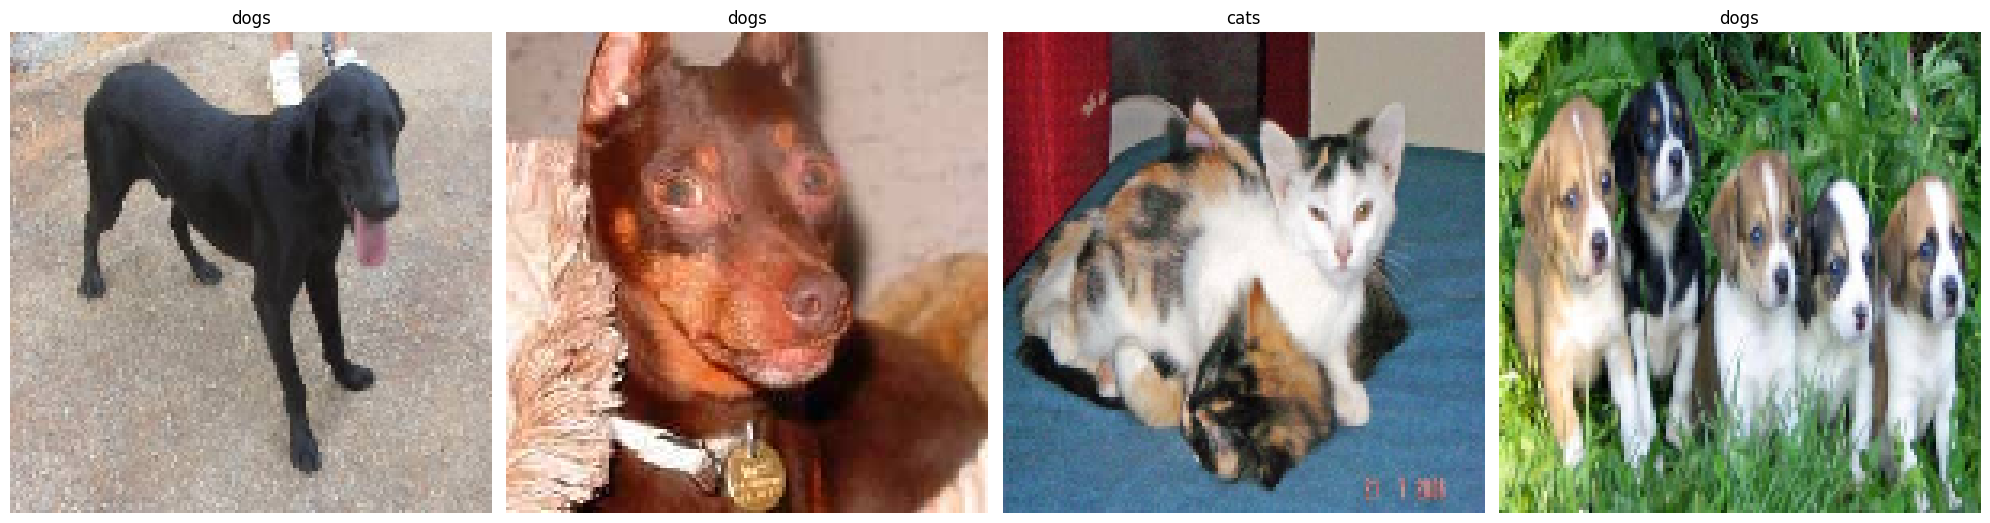

In [14]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [15]:
train_generator.reset()

# **Building Model**

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

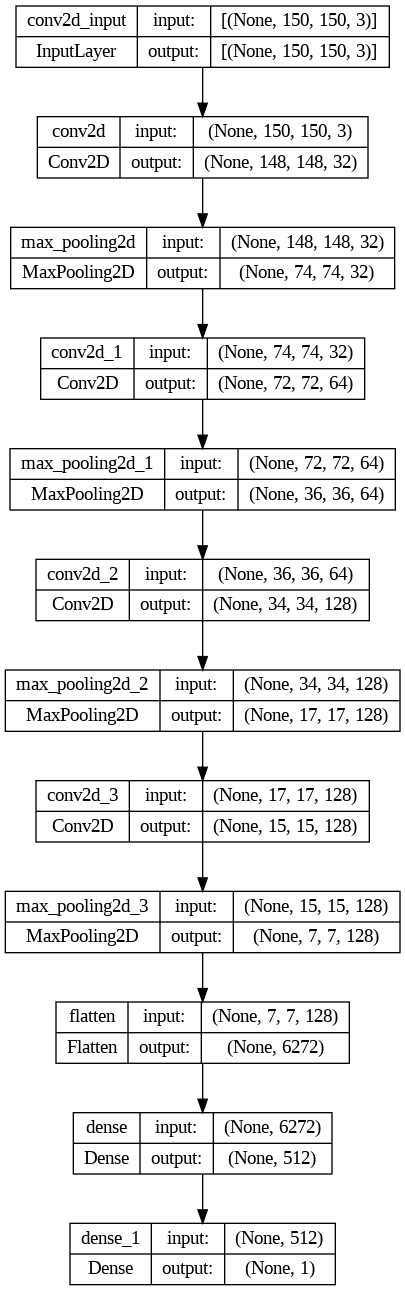

In [17]:
plot_model(model, to_file = 'Architecture.png', show_shapes=True, show_layer_names=True)

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)


800.0 200.0


In [20]:
history = model.fit(
                    train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200)

Epoch 1/10
800/800 [==============================] - 45s 47ms/step - loss: 0.6501 - accuracy: 0.6060 - val_loss: 0.5646 - val_accuracy: 0.7023
Epoch 2/10
800/800 [==============================] - 39s 49ms/step - loss: 0.5208 - accuracy: 0.7384 - val_loss: 0.4575 - val_accuracy: 0.7868
Epoch 3/10
800/800 [==============================] - 41s 51ms/step - loss: 0.4318 - accuracy: 0.8005 - val_loss: 0.4095 - val_accuracy: 0.8060
Epoch 4/10
800/800 [==============================] - 39s 49ms/step - loss: 0.3594 - accuracy: 0.8399 - val_loss: 0.3714 - val_accuracy: 0.8322
Epoch 5/10
800/800 [==============================] - 38s 47ms/step - loss: 0.3008 - accuracy: 0.8721 - val_loss: 0.3611 - val_accuracy: 0.8455
Epoch 6/10
800/800 [==============================] - 38s 47ms/step - loss: 0.2371 - accuracy: 0.8992 - val_loss: 0.3448 - val_accuracy: 0.8520
Epoch 7/10
800/800 [==============================] - 39s 48ms/step - loss: 0.1850 - accuracy: 0.9231 - val_loss: 0.3553 - val_accuracy:

In [21]:
history.history

{'loss': [0.6500834226608276,
  0.520825982093811,
  0.43182387948036194,
  0.3593565821647644,
  0.3008383512496948,
  0.23706835508346558,
  0.1850113868713379,
  0.11956832557916641,
  0.08516824245452881,
  0.06776971369981766],
 'accuracy': [0.6060000061988831,
  0.7383750081062317,
  0.8004999756813049,
  0.8398749828338623,
  0.8720625042915344,
  0.8992499709129333,
  0.9230625033378601,
  0.9524999856948853,
  0.9666249752044678,
  0.9742500185966492],
 'val_loss': [0.5645779371261597,
  0.45751604437828064,
  0.4094983637332916,
  0.3714413642883301,
  0.36111509799957275,
  0.3448238670825958,
  0.35533276200294495,
  0.440435528755188,
  0.4826264977455139,
  0.5334799885749817],
 'val_accuracy': [0.7022500038146973,
  0.7867500185966492,
  0.8059999942779541,
  0.8322499990463257,
  0.8454999923706055,
  0.8519999980926514,
  0.8535000085830688,
  0.8577499985694885,
  0.8567500114440918,
  0.856249988079071]}

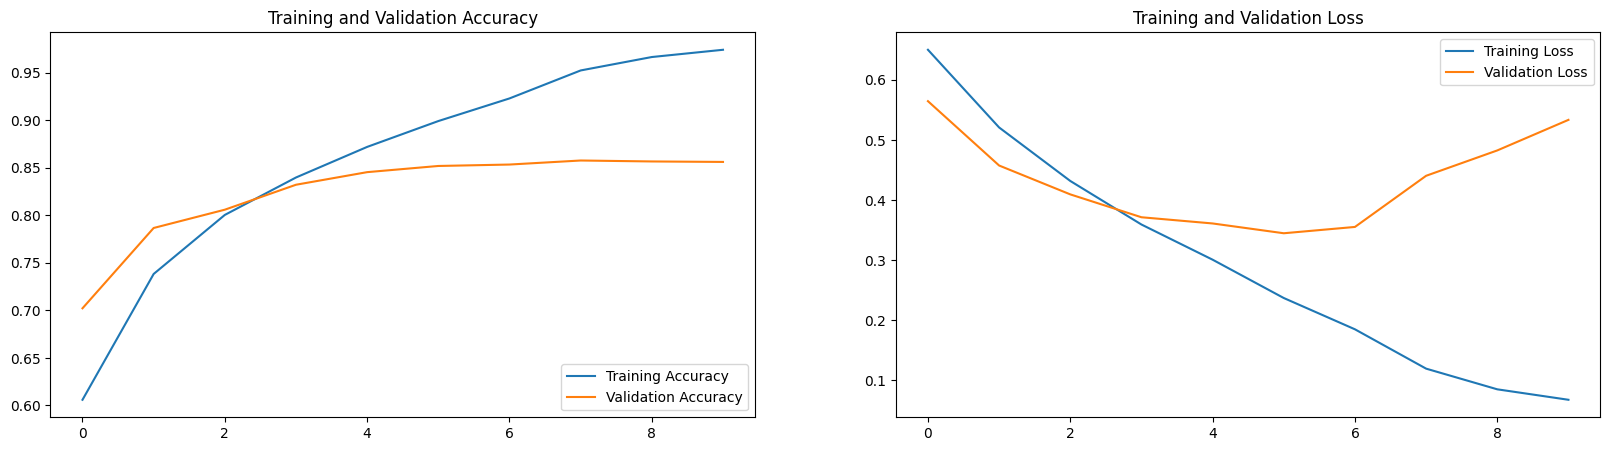

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Model Evaluation**

In [23]:
#initializing test generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


In [24]:
#making test predictions
np.ceil(test_generator.samples/test_generator.batch_size)


probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 9s 37ms/step


array([[9.9759282e-06],
       [9.3627898e-07],
       [2.9403114e-04],
       ...,
       [1.0000000e+00],
       [2.8827479e-01],
       [5.6619102e-01]], dtype=float32)

In [25]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 8s 32ms/step


array([0, 0, 0, ..., 1, 0, 1])

#plotting confusion matrix

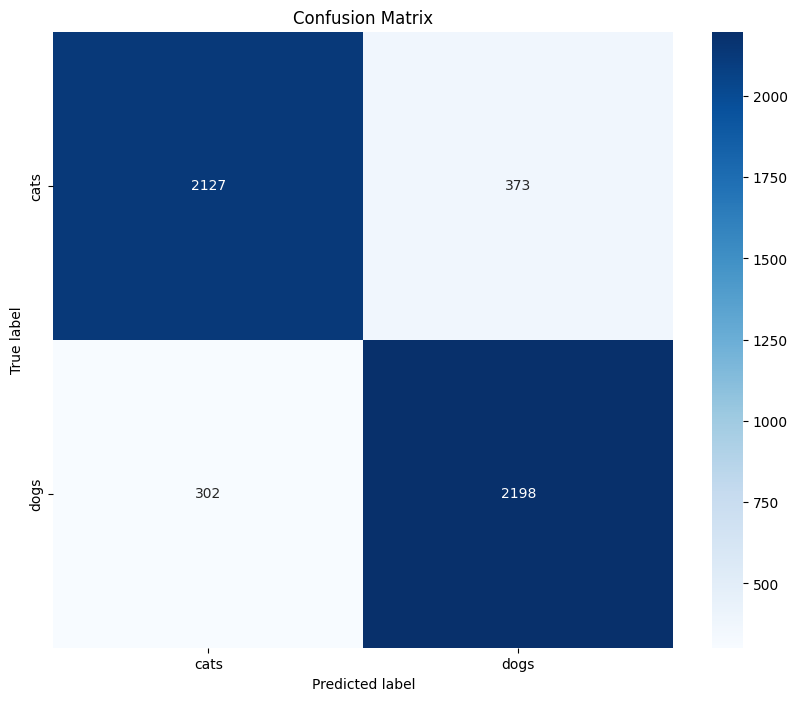

In [26]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
#inference

loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")


250/250 [==============================] - 14s 55ms/step - loss: 0.5115 - accuracy: 0.8650
Test accuracy: 86.50%
Test loss: 0.51
